### ID5059 KDDM
### Assignment: P02
### Group Name : Demented But Determined

Group Members:
- 200005828
- 190001708
- 210012057
- 210003557
- 210010283
- Anli

<hr>


<hr>

## Introduction to the Dataset

The dataset consists of five files :
1.	test_identity.csv
    - Identity Dataset to test performance of model
2.	test_transaction.csv
    - Transaction Dataset to test performance of model
3.	train_identity.csv
    - Identity Dataset to be used for model training
4.	train_transaction.csv
    - Transaction Dataset to be used for model training
5.	sample_submission.csv
    - File containing prediction results


Column names in train and test identity dataset has different formats.
We renamed test identity columns name to match to that of train column names.

## Transaction Dataset :

Columns in the transaction dataset can be grouped as below:

1.	TransactionID
    -	ID of the transaction and is used to connect to identity dataset
2.	isFraud
    -	Indicating if the transaction is fraud or not
3.	TransactionAmt
    -	Transaction amount (in USD)
4.	ProductCD
    - Product code  with 5 distinct categories
    - Categorical Features
5.	card1 -  card6
    - Payment card information
    - Card 4 contains 4 distinct categories of the card used for the transaction
    - Card5 has 120 unique values
    - Card6 has 4 distinct categories
    - Categorical Features
    - Actual values are masked for some columns
6.	addr1 - addr2
    - addr1 - billing region
    - addr2 -  billing country
    - Categorical Features
7.	dist1 - dist2
    - Distance
    - Categorical Features
8.	P_emaildomain
    - purchaser email domains
    - Categorical Features
9.	R_emaildomain
    - recipient email domains
    - Categorical Features
10.	C1 - C14
    - counting, such as how many addresses are found to be associated with the payment card, etc.
    - The actual meaning is masked
11.	D1 - D15
    - timedelta, such as days between previous transaction, etc
12.	M1 - M9
    - match, such as names on card and address, etc.
    - Categorical Features
13.	V1 - V339
    - Vesta engineered rich features, including ranking, counting, and other entity relations.


## Identity Dataset :

1.	TransactionID
    - ID of the transaction and is used to connect to transaction dataset
2.	DeviceType
    - Device type used for transaction mobile or desktop
    - Categorical Features
3.	DeviceInfo
    - Information about the device used for transaction
    -   Categorical Features
4.	id-01 to id-38
    - Masked information about the device



### Install libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn import over_sampling
from utils.preprocess import preprocess
from utils.reduce_memory import reduce_mem_usage
from sklearn.model_selection import train_test_split
from utils.model_stack import stack_models
from random import sample


### Load the data

Download the dataset from Kaggle and unzip it 'data' folder parallel to the notebook.

In [2]:
root_dir = './data/'
test_iden = pd.read_csv(root_dir + 'test_identity.csv')
test_tran = pd.read_csv(root_dir + 'test_transaction.csv')
train_iden = pd.read_csv(root_dir + 'train_identity.csv')
train_tran = pd.read_csv(root_dir + 'train_transaction.csv')

Due to the large size, to keep loading size down we optimize data types to reduce memory usage.

In [3]:
print(f"Before Type down-casting  : The shape of the Train {train_tran.shape} , Test {test_tran.shape}")
test_tran = reduce_mem_usage(test_tran)
train_tran = reduce_mem_usage(train_tran)
print(f"Before Type down-casting  : The shape of the Train {train_tran.shape} , Test {test_tran.shape}")

Before Type down-casting  : The shape of the Train (590540, 394) , Test (506691, 393)
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 425.24 MB
Decreased by 72.0%
Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%
Before Type down-casting  : The shape of the Train (590540, 394) , Test (506691, 393)


In [4]:
#Merge the Transaction and Identity data set to create the 'Test' set.
train = pd.merge(train_tran, train_iden, on = 'TransactionID', how = 'left')
test = pd.merge(test_tran, test_iden, on = 'TransactionID', how = 'left')

In [5]:
print(f"After merging  : The shape of the Train {train.shape} , Test {test.shape}")

After merging  : The shape of the Train (590540, 434) , Test (506691, 433)


In [6]:
SEED= 42
train, dev_test = train_test_split(train, test_size=0.2, random_state=int(SEED))

print("Train size"+ str(train.shape))
print("DevTest size"+ str(dev_test.shape))

Train size(472432, 434)
DevTest size(118108, 434)


In [7]:
del train_tran, train_iden, test_iden, test_tran

Test_dataset and train_dataset had a mismatch in the name of id features.
In the train_dataset id features were present with the name id_x where x was a value between
01 and 38 whereas in the test_dataset id features were of the form id-x.
So, we changed the format of id features in the test_dataset from id-x to id_x.

In [8]:
test.columns  = [col.replace('-','_') for col in test.columns]

In [9]:
# OK, the problem here is that D features are mostly NaNs!
d_features=["D"+str(x) for x in range(1,15)]
train[d_features].head(10)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
5307,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
191582,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
260168,7.0,7.0,6.0,420.0,6.0,NaN,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN
18516,211.0,211.0,NaN,211.0,211.0,211.0,211.0,162.75,0.75,211.0,NaN,NaN,0.0,NaN
47538,0.0,NaN,NaN,NaN,NaN,NaN,NaN,204.00,0.00,NaN,NaN,NaN,NaN,NaN
62390,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
288883,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
397255,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
465998,13.0,13.0,14.0,14.0,14.0,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN
323478,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [10]:
m_features=["M"+str(x) for x in range(1,9)]
train[m_features].head(10)


,M1,M2,M3,M4,M5,M6,M7,M8
5307,T,T,T,M0,T,T,F,F
191582,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN
260168,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
18516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62390,T,T,T,NaN,NaN,NaN,NaN,NaN
288883,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
397255,T,T,T,NaN,NaN,F,F,F
465998,T,T,T,NaN,NaN,F,F,F
323478,T,T,T,M0,F,F,NaN,NaN


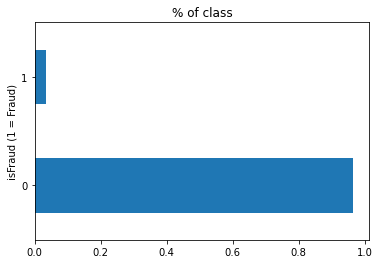

In [11]:
train['isFraud'].value_counts(normalize = True).plot(kind= 'barh')
plt.title('% of class')
plt.ylabel('isFraud (1 = Fraud)')
plt.show()

# TODO:  We find very few instance of Fraud. Consider Class Balancing.

## Feature Preprocessing

Systematically, deal with features by considering the following,
- 'M' columns - look like true or false lets convert them to 1, 0
- 'D' columns - these are fine all numerical
- 'C' columns - numerical except for 4,6

We deal with categorical variables using dummy vars.

In [12]:
train = preprocess(train)
test = preprocess(test)
dev_test = preprocess(dev_test)

In [13]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_02_to_mean_card4,id_02_to_std_card4,id_02_to_mean_addr1,id_02_to_std_addr1,D15_to_mean_card1,D15_to_std_card1,D15_to_mean_card4,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1
5307,2992307,0,174911,59.0000,W,4988,334.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
191582,3178582,0,4301977,23.3750,C,3867,296.0,185.0,visa,226.0,...,2.700445,2.944736,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
260168,3247168,0,6229929,35.9375,W,12577,268.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,2.597656,2.148405,2.490234,2.056071,2.582031,2.174831
18516,3005516,0,497176,100.0000,R,6019,583.0,150.0,visa,226.0,...,0.579748,0.632194,0.815571,0.858382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
47538,3034538,0,1124702,75.0000,H,16075,514.0,150.0,mastercard,102.0,...,0.481128,0.548746,0.815978,0.835990,NaN,NaN,NaN,NaN,NaN,NaN


### What features are we dropping and why?

TransactionID - Only a unique identifier for identity.

Id Columns - All Id columns contain at least 75% NaN values

V Columns - V columns consists of Vesta engineered features. They are large is number, have additional training overhead
            and do not add any significant performance improvement (As per Kaggle data discussion ).

<AxesSubplot:title={'center':'NaN as a %'}>

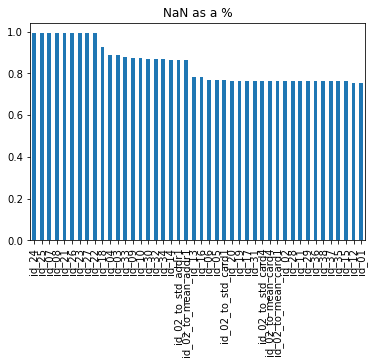

In [14]:
id_cols = [col for col in train.columns if col.startswith('id')]
df_id = train[id_cols]
nulls = df_id.isnull().sum()/len(df_id) #as a percentage
nulls.sort_values(ascending=False).plot.bar(title='NaN as a %')

In [15]:
v_cols = [col for col in train.columns if col.startswith('V')]
train.drop(v_cols,axis =1, inplace = True)
train.drop(id_cols, axis = 1,inplace = True)
test.drop(v_cols,axis =1, inplace = True)
test.drop(id_cols, axis = 1,inplace = True)
dev_test.drop(v_cols,axis =1, inplace = True)
dev_test.drop(id_cols, axis = 1,inplace = True)

In [16]:
categorical_features = list(set(train.columns) - set(train._get_numeric_data().columns))
#we get dummy for some features only
all_cat_col_names = [ col for col in categorical_features
                    if len(train[col].unique()) < 15]

large_cats_col_names = list(set(train.columns) - set(train._get_numeric_data()) - set(all_cat_col_names))

One hot encoding of all the categorical variables.

In [17]:
from sklearn.preprocessing import OneHotEncoder  #the disco import
def dummy_transform(df,encoder,col):
  new_col = [col+'_' + str(i)  for i in encoder.categories_[0].tolist()]
  dummy_arr = encoder.transform(df[col].to_numpy().reshape(-1, 1))
  dummy_df = pd.DataFrame(dummy_arr, columns = new_col)

  # Allows nice concat-ing
  dummy_df.reset_index(drop=True, inplace=True)
  df.reset_index(drop=True, inplace=True)
  return pd.concat([df, dummy_df],axis =1)


for col in all_cat_col_names:
  print('encoding',col)
  enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
  dummy_train = enc.fit_transform(train[col].to_numpy().reshape(-1, 1))

  train = dummy_transform(train,enc,col)
  dev_test = dummy_transform(dev_test,enc,col)
  test = dummy_transform(test,enc,col)

encoding M1
encoding ProductCD
encoding M2
encoding P_emaildomain_2
encoding P_emaildomain_3
encoding M4
encoding R_emaildomain_3
encoding R_emaildomain_2
encoding card6
encoding DeviceType
encoding M8
encoding OS_id_30
encoding M5
encoding M9
encoding card4
encoding M3
encoding M7
encoding device_name
encoding M6


In [19]:
(train.shape, dev_test.shape,test.shape)


((472432, 187), (118108, 187), (506691, 186))

In [20]:
print(f"Before dropping: The shape of the Train {train.shape} ")

train.drop(all_cat_col_names,axis =1,inplace = True )
print(f"After dropping: The shape of the Train {train.shape} ")

Before dropping: The shape of the Train (472432, 187) 
After dropping: The shape of the Train (472432, 168) 


In [21]:
print(f"Before dropping: The shape of the test {test.shape} ")

test.drop(all_cat_col_names,axis =1,inplace = True )
print(f"After dropping: The shape of the test {test.shape} ")

Before dropping: The shape of the test (506691, 186) 
After dropping: The shape of the test (506691, 167) 


In [22]:
print(f"Before dropping: The shape of the test {dev_test.shape} ")
dev_test.drop(all_cat_col_names,axis =1,inplace = True )
print(f"After dropping: The shape of the test {dev_test.shape} ")

Before dropping: The shape of the test (118108, 187) 
After dropping: The shape of the test (118108, 168) 


In [ ]:
a=[c for c in train.columns if c.startswith('card')]
train[a].head()

In [23]:
train['isFraud'].unique()

array([0, 1], dtype=int8)

In [24]:
(train.shape, dev_test.shape)

((472432, 168), (118108, 168))

We need to deal with the variables with high number of cats.


In [25]:
def frequency_encoder(x,groupby):
  if x == None:
    return groupby.get(np.nan)
  else:
    return groupby.get(x)


  # large_cats
for col in large_cats_col_names:
  freq_enc = (train.groupby(col,dropna=False  # to prevent loss of information
                            ).size()) / len(train)
  train[col+'freq'] = train[col].apply(lambda x : frequency_encoder(x,freq_enc))
  test[col+'freq'] = test[col].apply(lambda x : frequency_encoder(x,freq_enc))
  dev_test[col+'freq'] = dev_test[col].apply(lambda x : frequency_encoder(x,freq_enc))

train.drop(large_cats_col_names,axis = 1,inplace = True)
test.drop(large_cats_col_names,axis = 1,inplace = True)
dev_test.drop(large_cats_col_names,axis = 1,inplace = True)


### Column Imputation

How are we dealing with NaN/Missing/Infinite Values?


To use SMOTE we must remove np.infs and NaNs,
  - So we initially drop columns with less than 80% non-NA values.
  - Then, we drop rows containing NaN values

Using this resulted in a higher performance on balanced score measures than
keeping NaNs and not using SMOTE.


In [26]:
high_NA_columns = train.columns[train.isnull().sum()/len(train)>0.2]
## We need train_na asa separate DF for further processing.
train_na = train.drop(high_NA_columns, axis=1)
test= test.drop(high_NA_columns, axis=1)
dev_test = dev_test.drop(high_NA_columns, axis=1)

In [27]:
nulls = train_na.isnull().sum()/len(train_na) #as a percentage
nulls.sort_values(ascending=False)
# nulls.sort_values(ascending=False).plot.barh(title='NaN as a %')

D15_to_std_card1       0.163041
D15_to_mean_card1      0.161143
P_emaildomainfreq      0.159496
D15_to_std_card4       0.153262
D15_to_mean_card4      0.153262
                         ...   
P_emaildomain_2_net    0.000000
P_emaildomain_2_fr     0.000000
P_emaildomain_2_es     0.000000
P_emaildomain_2_de     0.000000
version_id_30freq      0.000000
Length: 149, dtype: float64

### Outlier removal

Since we are using ensemble tree methods that are robust to
outliers we choose not to perform outlier removal. Doing it in a
feature agnostic manner would destroy information on anomalies and doing
so otherwise would require pruning each column.

### Feature engineering (Creation)
Anli/Yao
##### Splitting email domains
##### Checking decimals in the transaction Amount
##### Extracting device info
      - device name
          Extaction
          Correction
      - device version
      - Operating system ID
      - Operating system version
      - browser ID
      - browser version
      - screen width
      - screen height

#### Aggregating columns to generate new features
      Anli/Yao
#### Changing data types of categorical columns to category
      Anli/Yao
#### Converting M columns to 1 and 0
      Anli/Yao
#### Transaction Amount Transformations
      Anli/Yao

### Class Balancing
To perform class balancing we use SMOTE from Imbalanced Learn, to create samples
of minority data.

In [28]:
# Class balancing only for train data for comparing it later on.

train_no_na = train_na[~train_na.isin([np.nan, np.inf, -np.inf]).any(1)]
test = test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]
dev_test = dev_test[~dev_test.isin([np.nan, np.inf, -np.inf]).any(1)]
# train_no_na = train_no_na._get_numeric_data()
X_train, y_train = train_no_na.drop('isFraud',axis = 1), train_no_na['isFraud']
oversample = over_sampling.SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train.drop('TransactionID', axis=1, inplace = True)

# Dev test data for model checking
X_test, y_test = dev_test.drop(['isFraud', 'TransactionID'], axis = 1), dev_test['isFraud']


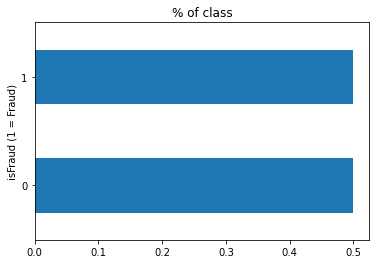

In [29]:
y_train.value_counts(normalize = True).plot(kind= 'barh')
plt.title('% of class')
plt.ylabel('isFraud (1 = Fraud)')
plt.show()

## Model Creation & Fitting
### Individual models





# START

In [ ]:
train.hist(column='id_01',bins=77)

In [ ]:
train['id_03'].value_counts(dropna=False, normalize=True).head()

In [ ]:
train['id_01'].unique()

In [ ]:
train['id_02'].unique()

In [ ]:
train['id_03'].unique()

In [ ]:
train['id_04'].unique()

In [ ]:
train['id_05'].unique()

In [ ]:
train['id_06'].unique()

In [ ]:
train['id_07'].unique()

In [ ]:
train['id_08'].unique()

In [ ]:
train['id_09'].unique()

In [ ]:
train['id_10'].unique()

In [ ]:
train['id_11'].unique()

In [ ]:
train['id_12'].unique()

In [ ]:
train['id_13'].unique()

In [ ]:
train['id_14'].unique()

In [ ]:
train['id_15'].unique()

In [ ]:
train['id_16'].unique()

In [ ]:
train['id_17'].unique()

In [ ]:
train['id_18'].unique()

In [ ]:
train['id_19'].unique()

In [ ]:
train['id_20'].unique()

In [ ]:
train['id_21'].unique()

In [ ]:
train['id_22'].unique()

In [ ]:
train['id_23'].unique()

In [ ]:
train['id_24'].unique()

In [ ]:
train['id_25'].unique()

In [ ]:
train['id_26'].unique()

In [ ]:
train['id_27'].unique()

In [ ]:
train['id_28'].unique()

In [ ]:
train['id_29'].unique()

In [ ]:
train['id_30'].unique()

In [ ]:
train['id_31'].unique()

In [ ]:
train['id_32'].unique()

In [ ]:
train['id_33'].unique()

In [ ]:
train['id_34'].unique()

In [ ]:
train['id_35'].unique()

In [ ]:
train['id_36'].unique()

In [ ]:
train['id_37'].unique()

In [ ]:
train['id_38'].unique()

# END